In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
## import data
data_path = "data/housing.csv"
housing_data = pd.read_csv(data_path)
housing_data.head(5)

,수도권여부,연도,주택유형,점유형태,보유주택,주택나이,주택면적,만족도,이사계획,내집보유에대한생각,...,총가구원수,월평균가구소득,생활비,주거관리비부담정도,총자산,총부채,최종학력,최종가중치,주거지원프로그램1,주거지원프로그램2
0,1,1980,2,2,2,8,49.5,3,2,1,...,4,180,100,2,6500,0,1,180.508046,2,3
1,1,2017,2,3,2,7,56.1,3,2,1,...,1,70,70,1,9000,0,2,397.739979,6,5
2,1,1993,2,1,2,8,39.6,3,2,1,...,5,60,60,2,40000,0,1,315.241737,4,3
3,1,1994,6,1,2,8,49.5,3,2,1,...,6,248,230,2,23000,0,1,252.579915,6,5
4,1,2018,6,3,2,7,9999999.0,3,2,2,...,3,120,120,2,13000,13000,1,245.946173,2,10


In [29]:
np_housing_data = np.array(housing_data)
print(np_housing_data[0:5, :])

[[1.00000000e+00 1.98000000e+03 2.00000000e+00 2.00000000e+00
  2.00000000e+00 8.00000000e+00 4.95000000e+01 3.00000000e+00
  2.00000000e+00 1.00000000e+00 1.00000000e+00 1.92900000e+03
  4.00000000e+00 1.80000000e+02 1.00000000e+02 2.00000000e+00
  6.50000000e+03 0.00000000e+00 1.00000000e+00 1.80508046e+02
  2.00000000e+00 3.00000000e+00]
 [1.00000000e+00 2.01700000e+03 2.00000000e+00 3.00000000e+00
  2.00000000e+00 7.00000000e+00 5.61000000e+01 3.00000000e+00
  2.00000000e+00 1.00000000e+00 1.00000000e+00 1.93300000e+03
  1.00000000e+00 7.00000000e+01 7.00000000e+01 1.00000000e+00
  9.00000000e+03 0.00000000e+00 2.00000000e+00 3.97739979e+02
  6.00000000e+00 5.00000000e+00]
 [1.00000000e+00 1.99300000e+03 2.00000000e+00 1.00000000e+00
  2.00000000e+00 8.00000000e+00 3.96000000e+01 3.00000000e+00
  2.00000000e+00 1.00000000e+00 2.00000000e+00 1.93500000e+03
  5.00000000e+00 6.00000000e+01 6.00000000e+01 2.00000000e+00
  4.00000000e+04 0.00000000e+00 1.00000000e+00 3.15241737e+02
  4.

In [31]:
datax = np_housing_data[:,:19]
datay = np_housing_data[:,20:21]
print(datax[0:5,:])
print(datay[0:10])

[[1.000000e+00 1.980000e+03 2.000000e+00 2.000000e+00 2.000000e+00
  8.000000e+00 4.950000e+01 3.000000e+00 2.000000e+00 1.000000e+00
  1.000000e+00 1.929000e+03 4.000000e+00 1.800000e+02 1.000000e+02
  2.000000e+00 6.500000e+03 0.000000e+00 1.000000e+00]
 [1.000000e+00 2.017000e+03 2.000000e+00 3.000000e+00 2.000000e+00
  7.000000e+00 5.610000e+01 3.000000e+00 2.000000e+00 1.000000e+00
  1.000000e+00 1.933000e+03 1.000000e+00 7.000000e+01 7.000000e+01
  1.000000e+00 9.000000e+03 0.000000e+00 2.000000e+00]
 [1.000000e+00 1.993000e+03 2.000000e+00 1.000000e+00 2.000000e+00
  8.000000e+00 3.960000e+01 3.000000e+00 2.000000e+00 1.000000e+00
  2.000000e+00 1.935000e+03 5.000000e+00 6.000000e+01 6.000000e+01
  2.000000e+00 4.000000e+04 0.000000e+00 1.000000e+00]
 [1.000000e+00 1.994000e+03 6.000000e+00 1.000000e+00 2.000000e+00
  8.000000e+00 4.950000e+01 3.000000e+00 2.000000e+00 1.000000e+00
  1.000000e+00 1.931000e+03 6.000000e+00 2.480000e+02 2.300000e+02
  2.000000e+00 2.300000e+04 0.0

In [32]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3)
print(trnx.shape, tstx.shape, trny.shape, tsty.shape)

(13122, 19) (5624, 19) (13122, 1) (5624, 1)


In [33]:
from sklearn.preprocessing import MinMaxScaler # Step 1
scaler = MinMaxScaler() # Step 2
scaler.fit(trnx) # Step 3
trnx_scale = scaler.transform(trnx) # Step 4
tstx_scale = scaler.transform(tstx) # Step 4
print(np.min(trnx_scale[:,0]), np.max(trnx_scale[:,0]))
print(np.min(tstx_scale[:,0]), np.max(tstx_scale[:,0]))

0.0 1.0
0.0 1.0


In [34]:
## kNN
from sklearn import neighbors
k=5
knn_model = neighbors.KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X=trnx, y=trny)

C:\Users\chopper\anaconda3\envs\machinelearning\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [35]:
knn_pred_trn = knn_model.predict(X=trnx)
knn_pred_tst = knn_model.predict(X=tstx)

In [36]:
print(knn_pred_trn)
print(knn_pred_tst)

[1. 3. 2. ... 4. 3. 3.]
[6. 2. 3. ... 1. 6. 3.]


In [37]:
from sklearn import metrics
print(metrics.accuracy_score(trny, knn_pred_trn))
print(metrics.accuracy_score(tsty, knn_pred_tst))

0.5411522633744856
0.37660028449502136


In [38]:
## Decision Tree
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=3)
tree_model.fit(X=trnx, y=trny)

DecisionTreeClassifier(max_depth=4, min_samples_split=3)

In [39]:
tree_pred = tree_model.predict(X=tstx)

In [40]:
tree_model.feature_importances_

array([0.        , 0.        , 0.1724088 , 0.47829738, 0.        ,
       0.00526397, 0.        , 0.00648036, 0.        , 0.01478125,
       0.07684285, 0.05569955, 0.        , 0.03394627, 0.        ,
       0.        , 0.12873284, 0.        , 0.02754672])

In [41]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot')

[Text(0.5, 0.9, 'X[3] <= 1.5\ngini = 0.794\nsamples = 13122\nvalue = [1185, 2958, 4486, 1262, 726, 1610, 638, 256, 1]'),
 Text(0.25, 0.7, 'X[2] <= 2.5\ngini = 0.657\nsamples = 5203\nvalue = [42, 406, 2782, 1084, 182, 329, 240, 137, 1]'),
 Text(0.125, 0.5, 'X[18] <= 1.5\ngini = 0.612\nsamples = 1235\nvalue = [7, 43, 376, 665, 35, 54, 28, 26, 1]'),
 Text(0.0625, 0.3, 'X[5] <= 4.5\ngini = 0.424\nsamples = 467\nvalue = [1, 5, 83, 344, 5, 11, 5, 12, 1]'),
 Text(0.03125, 0.1, 'gini = 0.612\nsamples = 27\nvalue = [0, 2, 14, 9, 1, 1, 0, 0, 0]'),
 Text(0.09375, 0.1, 'gini = 0.394\nsamples = 440\nvalue = [1, 3, 69, 335, 4, 10, 5, 12, 1]'),
 Text(0.1875, 0.3, 'X[7] <= 2.5\ngini = 0.671\nsamples = 768\nvalue = [6, 38, 293, 321, 30, 43, 23, 14, 0]'),
 Text(0.15625, 0.1, 'gini = 0.633\nsamples = 180\nvalue = [1, 8, 41, 99, 6, 17, 4, 4, 0]'),
 Text(0.21875, 0.1, 'gini = 0.666\nsamples = 588\nvalue = [5, 30, 252, 222, 24, 26, 19, 10, 0]'),
 Text(0.375, 0.5, 'X[11] <= 1962.5\ngini = 0.603\nsamples = 39

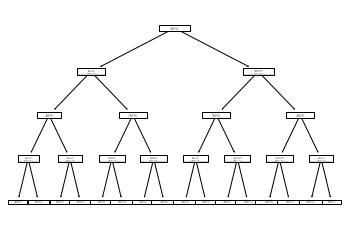

In [42]:
tree.plot_tree(tree_model)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(tsty, tree_model.predict(tstx))

array([[ 228,  279,   30,    6,    0,    0,    0,    0],
       [ 132,  734,  336,   20,    0,    0,    0,    0],
       [  39,  437, 1407,   63,    0,    0,    0,    0],
       [  11,   25,  309,  220,    0,    0,    0,    0],
       [  25,  157,   84,    6,    0,    0,    0,    0],
       [ 150,  360,  145,   18,    0,    0,    0,    0],
       [  30,  124,  134,    5,    0,    0,    0,    0],
       [  15,   23,   66,    6,    0,    0,    0,    0]], dtype=int64)

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X=trnx, y=trny)

DecisionTreeClassifier()

In [45]:
## Ensemble
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=15, n_estimators=100, random_state=0)
rf_model.fit(X=trnx, y=trny)

C:\Users\chopper\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(max_depth=15, random_state=0)

In [46]:
rf_pred = rf_model.predict(X=tstx)

In [47]:
from sklearn import metrics
print(metrics.accuracy_score(tsty, rf_pred))

0.5035561877667141


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(max_depth=3, n_estimators = 30, random_state = 0)
gbm_model.fit(X=trnx, y=trny)

C:\Users\chopper\anaconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=30, random_state=0)

In [49]:
gbm_pred = gbm_model.predict(X=tstx)

In [50]:
from sklearn import metrics
print(metrics.accuracy_score(tsty, gbm_pred))

0.4870199146514936


In [51]:
## Performance Evaluation
from sklearn.metrics import accuracy_score
acc = np.array([accuracy_score(tsty, tree_pred),accuracy_score(tsty, gbm_pred)])
print(acc)

[0.46034851 0.48701991]


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(tsty, tree_pred)

array([[ 228,  279,   30,    6,    0,    0,    0,    0],
       [ 132,  734,  336,   20,    0,    0,    0,    0],
       [  39,  437, 1407,   63,    0,    0,    0,    0],
       [  11,   25,  309,  220,    0,    0,    0,    0],
       [  25,  157,   84,    6,    0,    0,    0,    0],
       [ 150,  360,  145,   18,    0,    0,    0,    0],
       [  30,  124,  134,    5,    0,    0,    0,    0],
       [  15,   23,   66,    6,    0,    0,    0,    0]], dtype=int64)

In [53]:
confusion_matrix(tsty, gbm_pred)

array([[ 185,  246,   28,    6,    1,   76,    0,    1],
       [  71,  656,  392,   13,    1,   88,    0,    1],
       [  17,  313, 1484,   98,    0,   34,    0,    0],
       [   6,   21,  242,  289,    0,    6,    0,    1],
       [  11,  109,  120,    5,    0,   26,    0,    1],
       [  95,  270,  169,   13,    2,  124,    0,    0],
       [  18,   99,  147,    2,    0,   25,    1,    1],
       [  12,   20,   60,    9,    0,    9,    0,    0]], dtype=int64)